# Statistical Question

What factors affect temperature and contribute to cliamte change?

# Variables:
- Aerosols: Represents the concentration of aerosols.
- CH4: Represents the concentration of methane.
- MEI: Multivariate El Niño Southern Oscillation Index - a measure of the El Niño or La Niña climate pattern.
- CO2: Carbon dioxide concentration - a key greenhouse gas.
- Temp: Temperature - the recorded temperature.

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import zscore
from scipy.stats import norm

The Z-score test for outliers is employed to identify data points significantly deviating from the mean. Using a Z-score threshold, such as 2 or 3 standard deviations, allows for a standardized and quantitative approach to pinpoint extreme values, aiding in data cleaning and analysis. 13 outliers were identified, suggesting that these points exhibit substantial deviations from the mean in the variables Aerosols, CH4, MEI, CO2, and Temp.

# Outlier Detection

In [77]:
weather = pd.read_csv("climate_change.csv")

numeric_columns = ['Aerosols', 'CH4', 'MEI', 'CO2', 'Temp']
z_scores = np.abs(zscore(weather[numeric_columns]))
z_threshold = 3
outliers = (z_scores > z_threshold).any(axis=1)
print("Number of Outliers:", outliers.sum())
weather = weather[~outliers]

Number of Outliers: 13


# Histograms

The histograms depict the distributions of five environmental variables:
- Aerosols 
- CH4 (Methane)
- MEI (Multivariate ENSO Index)
- CO2 (Carbon Dioxide)
- Temp (Temperature)

Aerosols exhibit a left-skewed pattern, indicating a prevalence of lower values. CH4 shows a right-skewed distribution, suggesting a higher occurrence of elevated methane levels. MEI's slightly right-skewed distribution leans towards normality. CO2 displays an inverted U-shaped distribution, reflecting a broad range of carbon dioxide values. The Temperature graph reveals a slight double-peaked distribution, implying the presence of two distinct conditions or groups within the temperature data.

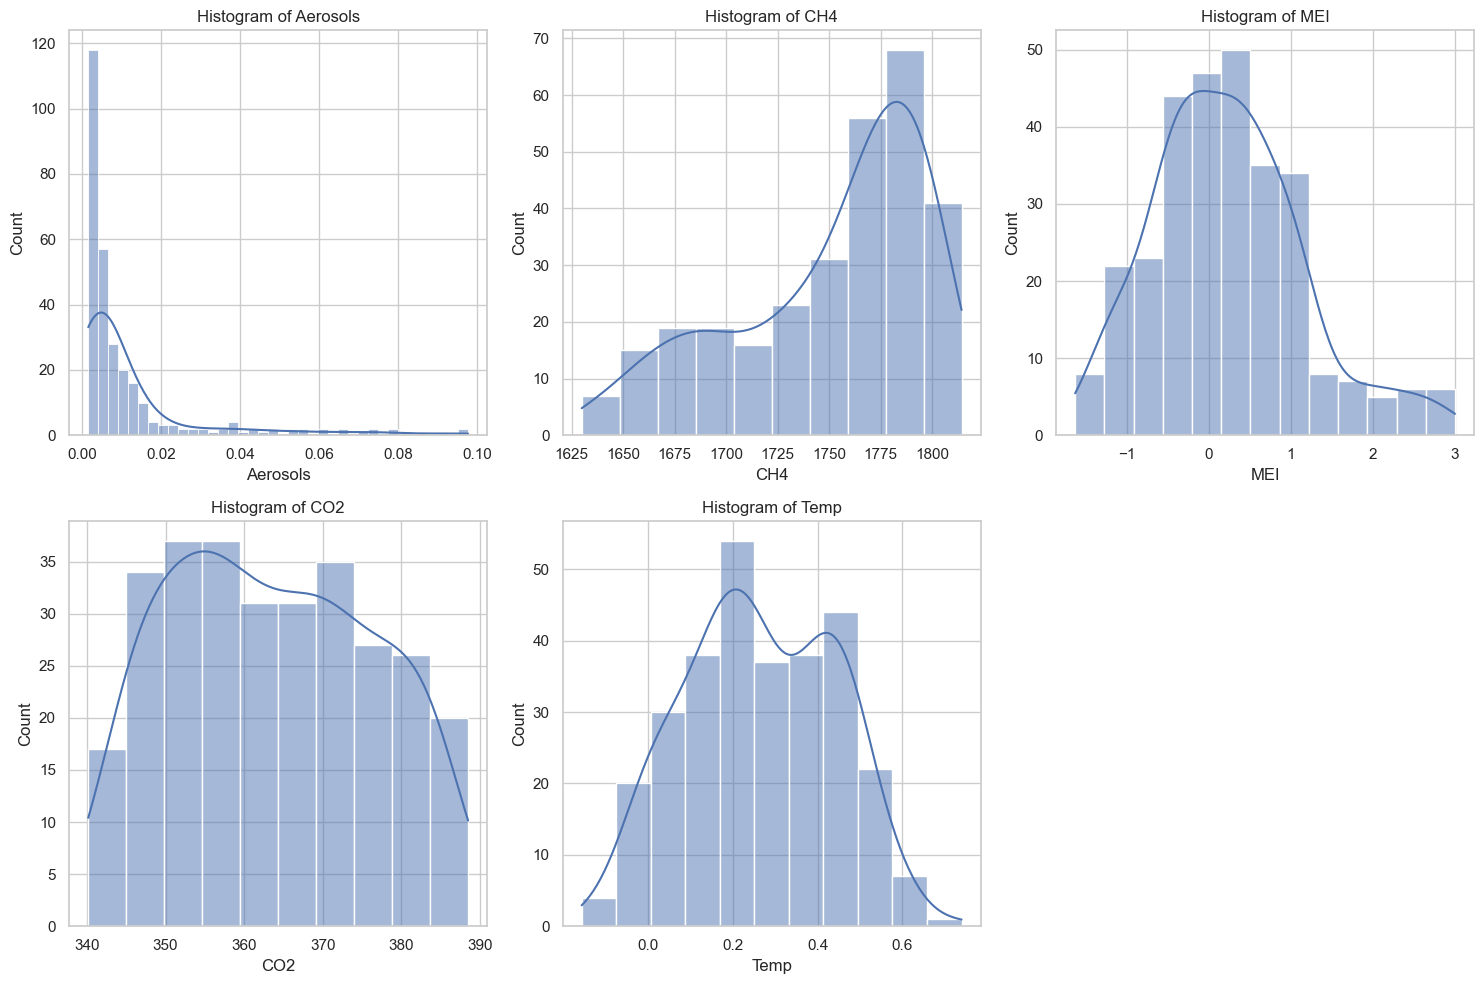

In [78]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 10))

for i, column in enumerate(['Aerosols', 'CH4', 'MEI', 'CO2', 'Temp']):
    plt.subplot(2, 3, i+1)
    sns.histplot(weather[column], kde=True)
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

# Descriptive Statistics

Mean values offer insights into the average levels with aerosols averaging at 0.011968 and methane at 1750.27. Mode values indicate the most frequent observations, such as May 1985 being most common for the 'Month' column. Standard deviation values reveal variability, and skewness values hint at distribution shapes, such as positive skewness for CH4, suggesting a rightward tail. In summary, these statistics characterize the central tendency, variability, and distribution of the environmental data.

In [79]:
descriptive_stats = weather.describe()
mean_values = descriptive_stats.loc['mean']
mode_values = weather.mode().iloc[0]
spread_values = descriptive_stats.loc['std']
tails_values = [weather[column].skew() for column in ['Aerosols', 'CH4', 'MEI', 'CO2', 'Temp']]

print("Mean Values:\n", mean_values)
print("\nMode Values:\n", mode_values)
print("\nSpread (Standard Deviation) Values:\n", spread_values)
print("\nSkewness (Tails) Values:\n", tails_values)

Mean Values:
 Year        1995.861017
Month          6.535593
MEI            0.231258
CO2          363.575051
CH4         1750.266780
N2O          312.519963
CFC-11       251.448122
CFC-12       497.745766
TSI         1366.061232
Aerosols       0.011968
Temp           0.264610
Name: mean, dtype: float64

Mode Values:
 Year        1985.0000
Month          5.0000
MEI           -1.0110
CO2          343.2000
CH4         1666.8300
N2O          318.8660
CFC-11       265.7840
CFC-12       542.2790
TSI         1365.6509
Aerosols       0.0021
Temp           0.1760
Name: 0, dtype: float64

Spread (Standard Deviation) Values:
 Year         7.510379
Month        3.438169
MEI          0.919318
CO2         12.786030
CH4         46.790855
N2O          5.296195
CFC-11      20.224753
CFC-12      58.627737
TSI          0.401237
Aerosols     0.017635
Temp         0.176554
Name: std, dtype: float64

Skewness (Tails) Values:
 [2.852067721259005, -0.835238574135076, 0.6045720726386367, 0.11809838019508813, 

# PMF

The x-axis shows the 'CO2 Concentration' and the y-axis represents the probability of each concentration level. What I'm seeing in the graph is a notable spike at the beginning, indicating a higher likelihood of lower CO2 concentrations. As you move to the right on the x-axis, there's a gradual decrease in probability, suggesting that higher CO2 concentrations are less common in the dataset. This kind of pattern is pretty standard for environmental data, where lower pollutant levels tend to be more prevalent than higher ones.

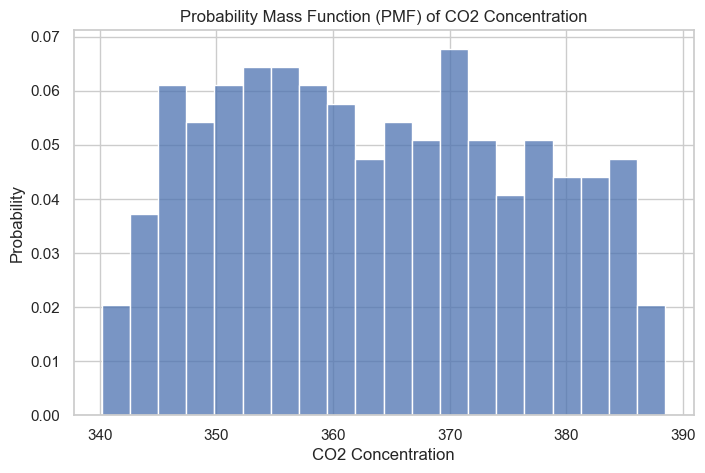

In [80]:
plt.figure(figsize=(8, 5))
sns.histplot(weather['CO2'], stat='probability', kde=False, bins=20)
plt.xlabel('CO2 Concentration')
plt.ylabel('Probability')
plt.title('Probability Mass Function (PMF) of CO2 Concentration')
plt.show()

# CDF

The x-axis shows 'CO2 Concentration' and the y-axis represents the cumulative probability of having a concentration equal to or less than a given value. What I'm noticing is a linear line going from the bottom left to the top right. This suggests a uniform and steady increase in the cumulative probability as CO2 concentrations go up. It looks like each concentration level is contributing consistently to the overall cumulative probability.

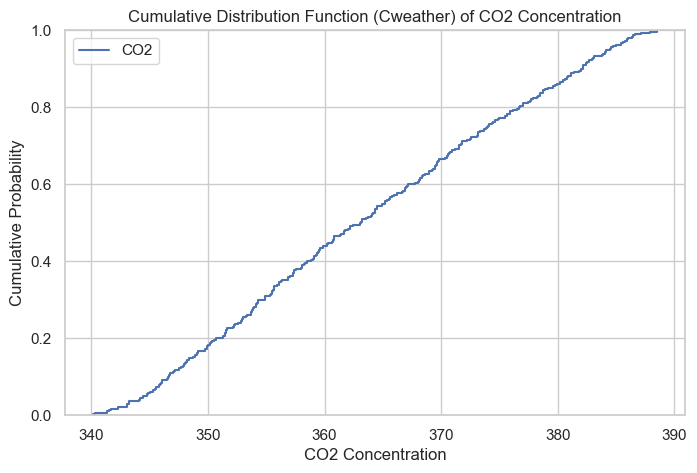

In [81]:
plt.figure(figsize=(8, 5))
sns.ecdfplot(weather['CO2'], label='CO2')
plt.xlabel('CO2 Concentration')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (Cweather) of CO2 Concentration')
plt.legend()
plt.show()

# Analytical Distribution

The blue histogram in the background shows the distribution of temperature values, and I noticed a subtle dual peak where one peak is larger than the other. To understand the distribution better, I added a black line representing a normal distribution curve fitted to the data's mean and standard deviation. This curve serves as a theoretical reference. The graph helps visualize the distribution characteristics of temperature, and the dual peaks suggest there might be two distinct conditions or modes in the dataset.

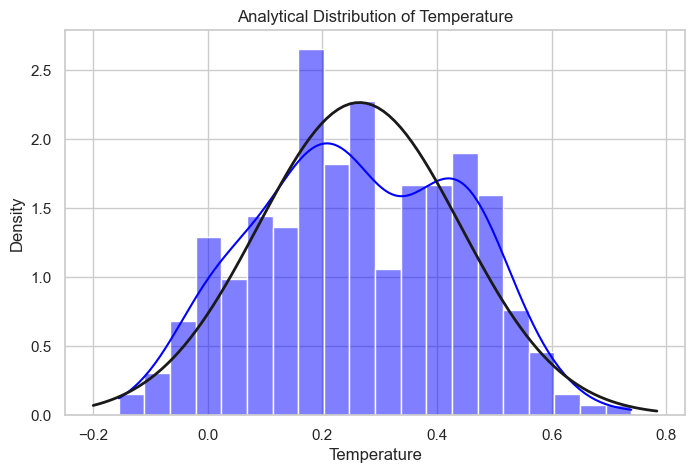

In [82]:
plt.figure(figsize=(8, 5))
sns.histplot(weather['Temp'], kde=True, stat='density', color='blue', bins=20)
plt.title('Analytical Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Density')

mu, std = norm.fit(weather['Temp'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.show()

# Scatter Plots

I made some scatter plots to check out how different environmental factors relate to temperature. In the first one, CO2 versus temperature, there's a U-shaped pattern, suggesting a non-linear connection where temperature rises with increasing CO2 but then drops again. The second plot, MEI versus temperature, looks a bit scattered with no clear trend, mostly hanging out on the left side. For the third one, Aerosols versus temperature, there's a bunch of points on the left, hinting that more aerosols might be linked to lower temperatures. Lastly, CH4 versus temperature shows a loose line with a slight curve up, suggesting a potential positive connection between methane levels and temperature.

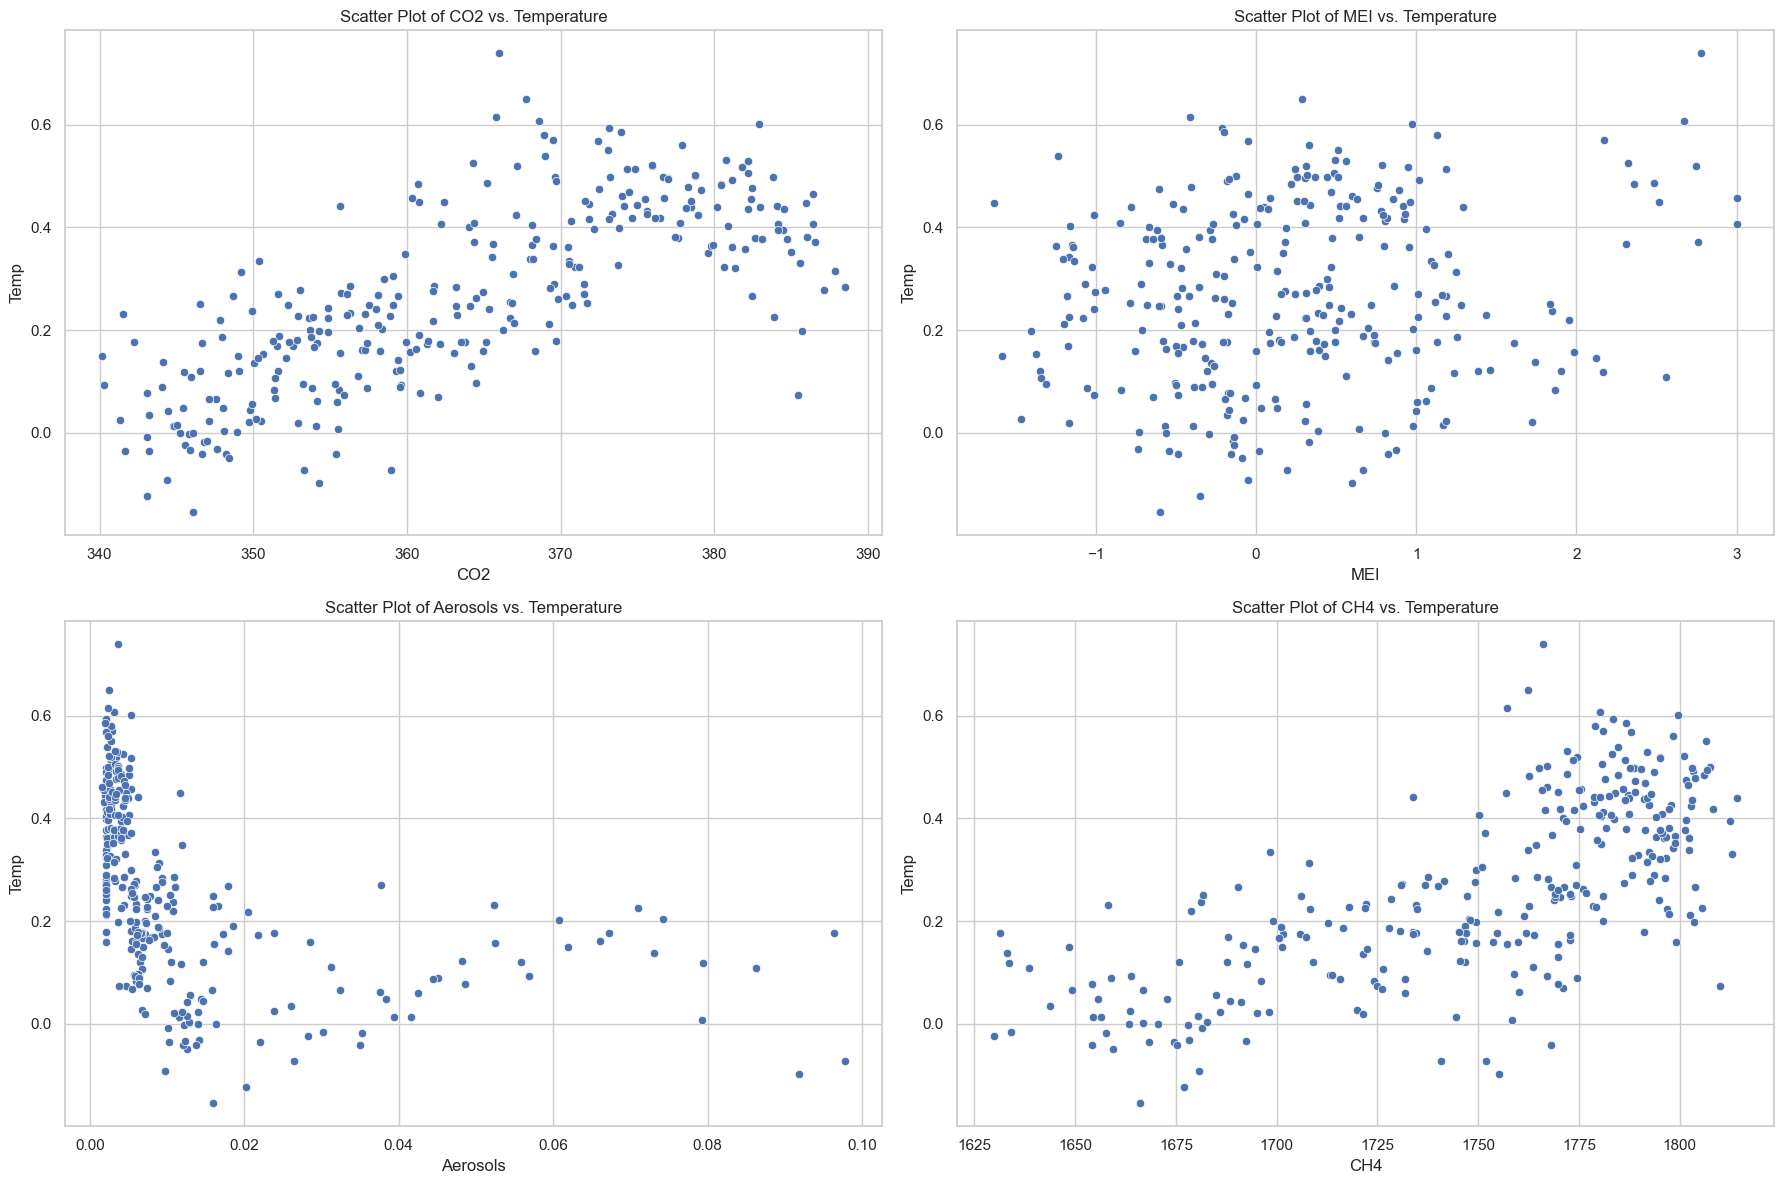

In [83]:
plt.figure(figsize=(18, 12))

# Scatter Plot 1
plt.subplot(2, 2, 1)
sns.scatterplot(x='CO2', y='Temp', data=weather)
plt.title('Scatter Plot of CO2 vs. Temperature')

# Scatter Plot 2
plt.subplot(2, 2, 2)
sns.scatterplot(x='MEI', y='Temp', data=weather)
plt.title('Scatter Plot of MEI vs. Temperature')

# Scatter Plot 3
plt.subplot(2, 2, 3)
sns.scatterplot(x='Aerosols', y='Temp', data=weather)
plt.title('Scatter Plot of Aerosols vs. Temperature')

# Scatter Plot 4
plt.subplot(2, 2, 4)
sns.scatterplot(x='CH4', y='Temp', data=weather)
plt.title('Scatter Plot of CH4 vs. Temperature')

plt.tight_layout()
plt.show()

# Hypothesis Testing

The observed correlation between CO2 and Temp is 0.7485. The permutation test p-value of 0.0 indicates that the observed correlation is statistically significant, suggesting that the correlation is unlikely to have occurred by chance alone.

In other words, there is strong evidence to support the hypothesis that there is a significant correlation between the concentration of carbon dioxide (CO2) and temperature (Temp) in your dataset. The p-value of 0.0 suggests that in 1000 permutations, none of the permuted correlations were as extreme as the observed correlation.

This result supports the idea that changes in CO2 concentration may be associated with changes in temperature. Keep in mind that correlation does not imply causation, and additional analyses and domain knowledge may be needed to infer causation or understand the nature of the relationship.

In [84]:
observed_corr, _ = pearsonr(weather['CO2'], weather['Temp'])
num_permutations = 1000
permuted_corrs = np.zeros(num_permutations)

for i in range(num_permutations):
    permuted_CO2 = np.random.permutation(weather['CO2'])
    permuted_corr, _ = pearsonr(permuted_CO2, weather['Temp'])
    permuted_corrs[i] = permuted_corr

p_value = np.sum(np.abs(permuted_corrs) >= np.abs(observed_corr)) / num_permutations

print("Observed Correlation:", observed_corr)
print("Permutation Test p-value:", p_value)

Observed Correlation: 0.7475743689997552
Permutation Test p-value: 0.0


# Regression Analysis

The multiple linear regression model using Ordinary Least Squares (OLS) was applied to explore the relationship between temperature ('Temp') and three predictor variables—'CO2,' 'Aerosols,' and 'MEI'—in the 'weather' dataset. The model yielded an R-squared of 0.670, signifying that approximately 67% of the variability in temperature can be explained by the predictors. The F-statistic (197.2) and associated p-value (8.60e-70) indicate the overall statistical significance of the model. Each predictor variable, 'CO2' (coefficient: 0.0095), 'Aerosols' (coefficient: -2.1513), and 'MEI' (coefficient: 0.0618), exhibited statistically significant impacts on temperature. Diagnostic statistics revealed potential deviations from normality and autocorrelation in the residuals. These findings provide valuable insights into the predictive capacity of the model and areas for potential refinement.

In [85]:
X = sm.add_constant(weather[['CO2', 'Aerosols', 'MEI']])
y = weather['Temp']

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     197.2
Date:                Sat, 18 Nov 2023   Prob (F-statistic):           8.60e-70
Time:                        16:45:26   Log-Likelihood:                 257.15
No. Observations:                 295   AIC:                            -506.3
Df Residuals:                     291   BIC:                            -491.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1885      0.195    -16.378      0.0